In [1]:
import pandas as pd
import numpy as np

In [2]:
datafile = "HR_dataset.csv"
data = pd.read_csv(datafile)

### Exploratory Data Analysis

In [3]:
display(data.head())
print(data.columns)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [4]:
data.groupby(["PerformanceRating"]).count()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
3,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,...,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244
4,226,226,226,226,226,226,226,226,226,226,...,226,226,226,226,226,226,226,226,226,226


### Survival Analysis
Here, we are interested in seeing how the YearsAtCompany vs Attrition

In [6]:
df = data[["YearsAtCompany","Attrition"]]

In [7]:
life_table = df.groupby("YearsAtCompany").count().rename(columns={"Attrition": "Population"})

In [8]:
life_table["AttritionNum"] = df.groupby("YearsAtCompany")["Attrition"].apply(lambda x: (x=='Yes').sum())

In [9]:
life_table["AttritionRate"] = life_table["AttritionNum"]/life_table["Population"]

In [10]:
### If you reach year n, what is the probability you will leave before n+1
### Here we make an assumption that the attition happens uniformly between day 1 to day 364 in a given year
### due to a lack of information
life_table["ConditionalProbAttrition"] = life_table["AttritionNum"]/(life_table["Population"]+0.5*life_table["AttritionNum"])
life_table["ConditionalProbNoAttrition"] = 1 - life_table["ConditionalProbAttrition"]

In [11]:
### Here we assume a baseline number  of population to be 100,000 so the caculation is made easier
# 
attrition_list = []
for index, row in life_table.iterrows():
    if index != 0 :
        attrition_list.append(pervious_rate*pervious_pop)
        pervious_rate = row["ConditionalProbNoAttrition"]
    else:
        attrition_list.append(100000)
    pervious_rate = row["ConditionalProbNoAttrition"]
    pervious_pop = attrition_list[-1]
life_table["AttritionNumToYear"] = attrition_list

In [12]:
life_table["ProportionToYear"] = life_table["AttritionNumToYear"]/100000

In [67]:
life_table

,Population,AttritionNum,AttritionRate,ConditionalProbAttrition,ConditionalProbNoAttrition,AttritionNumToYear,ProportionToYear,EmployeeYearAtYear,TotalYearEmployFromYear,TotalEmploymentExpectancy,ProportionWithExcellent,TotalEmpYearWithExcellent,TotalYearExcellentFromYear,ExcellentExpectancy,RemainInEmployment
YearsAtCompany,,,,,,,,,,,,,,,
0,44,16,0.363636,0.307692,0.692308,100000.000000,1.000000,84615.384615,528313.012478,5.283130,0.159091,13461.538462,8.453655e+04,8.453655e-01,0.636364
1,171,59,0.345029,0.294264,0.705736,69230.769231,0.692308,59044.695952,443697.627862,4.436976,0.169591,10013.427969,7.107501e+04,7.107501e-01,0.654971
2,127,27,0.212598,0.192171,0.807829,48858.622674,0.488586,44164.021919,384652.931910,3.846529,0.086614,3825.230245,6.106158e+04,6.106158e-01,0.787402
3,128,20,0.156250,0.144928,0.855072,39469.421164,0.394694,36609.318181,340488.909991,3.404889,0.156250,5720.205966,5.723635e+04,5.723635e-01,0.843750
4,110,19,0.172727,0.158996,0.841004,33749.215198,0.337492,31066.223195,303879.591810,3.038796,0.136364,4236.303163,5.151615e+04,5.151615e-01,0.827273
5,196,21,0.107143,0.101695,0.898305,28383.231192,0.283832,26940.016046,272813.368615,2.728134,0.183673,4948.166213,4.727984e+04,4.727984e-01,0.892857
6,76,9,0.118421,0.111801,0.888199,25496.800901,0.254968,24071.513894,245873.352569,2.458734,0.144737,3484.034906,4.233168e+04,4.233168e-01,0.881579
7,90,11,0.122222,0.115183,0.884817,22646.226887,0.226462,21341.993925,221801.838675,2.218018,0.100000,2134.199393,3.884764e+04,3.884764e-01,0.877778
8,80,9,0.112500,0.106509,0.893491,20037.760963,0.200378,18970.661267,200459.844750,2.004598,0.162500,3082.732456,3.671344e+04,3.671344e-01,0.887500


In [69]:
import plotly.express as px
px.line(x = life_table.index , y = life_table.ProportionToYear, template = "seaborn")

In [14]:
num_to_year = list(life_table["AttritionNumToYear"].values)
num_to_year_plus1 = num_to_year[1:] + [0]
life_table["EmployeeYearAtYear"] = (np.array(num_to_year)+np.array(num_to_year_plus1))/2

In [15]:
total_year_at0 = sum(life_table["EmployeeYearAtYear"].values)
total_year_list = [total_year_at0]

In [16]:
for value in life_table["EmployeeYearAtYear"].values[:-1]:
    total_year_list.append(total_year_list[-1] - value)

In [17]:
life_table["TotalYearEmployFromYear"] = total_year_list

In [18]:
life_table["TotalEmploymentExpectancy"] = life_table["TotalYearEmployFromYear"]/100000

### Evaulate employment terms with "Outstanding" performance rating

In [19]:
performance_rating = data[["YearsAtCompany","PerformanceRating"]]

In [26]:
life_table["ProportionWithExcellent"] = performance_rating.groupby("YearsAtCompany")["PerformanceRating"].apply(list).apply(lambda x: x.count(4)/len(x))

In [28]:
life_table["TotalEmpYearWithExcellent"] = life_table["EmployeeYearAtYear"]*life_table["ProportionWithExcellent"]

In [30]:
total_excellent_at0 = sum(life_table["TotalEmpYearWithExcellent"].values)
total_year_list = [total_excellent_at0]
for value in life_table["TotalEmpYearWithExcellent"].values[:-1]:
    total_year_list.append(total_year_list[-1] - value)

In [32]:
life_table["TotalYearExcellentFromYear"] = total_year_list

In [38]:
life_table["ExcellentExpectancy"] = life_table["TotalYearExcellentFromYear"] /100000

In [54]:
life_table["RemainInEmployment"] = (life_table["Population"]-life_table["AttritionNum"])/life_table["Population"]

In [40]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter() 
kmf.fit(life_table.index, life_table.AttritionNum,label='Kaplan Meier Estimate')

<lifelines.KaplanMeierFitter:"Kaplan Meier Estimate", fitted with 37 total observations, 9 right-censored observations>

<AxesSubplot:xlabel='timeline'>

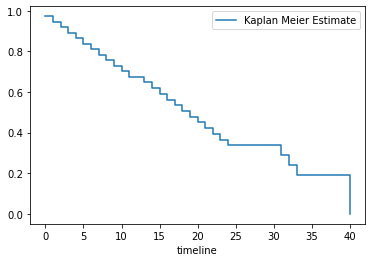

In [41]:
kmf.plot(ci_show=False) 

In [55]:
px.line(x= life_table.index, y = life_table["RemainInEmployment"])

<AxesSubplot:xlabel='timeline'>

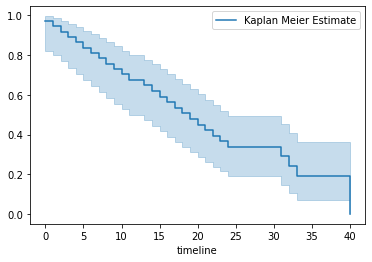

In [52]:
kmf.plot_survival_function()